In [2]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt



In [3]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3 #rgb
EPOCHS=50 #imj num

In [4]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
r"C:\Users\Zarqa_2023\Desktop\project_breas cancer3\treaning\breast deses",
 shuffle=True,#دمجت الصور مع بعض فالتدريب
 image_size = (IMAGE_SIZE, IMAGE_SIZE),
 batch_size=BATCH_SIZE   
)

Found 2376 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['Malignant', 'Normal', 'probably benign']

In [6]:
len(dataset)

75

In [7]:
#for image_batch, label_batch in dataset.take(1):
 #   print(image_batch.shape)
 #print(label_batch.numpy())
#'طبعت الصور كلهم وحلتهم من ترنسر لي نمباي باش نقراهم '

In [7]:
#for image_batch, label_batch in dataset.take(1):
  #  print(image_batch[0].numpy())
  #طبعت العنصر الاول بس لي هوا النورمال كنمباي لدا يطلعلي كقيم اللون والحجم من 0الي 255 بينهم تتراوح القيم

In [8]:
#for image_batch, label_batch in dataset.take(1):
  #  print(image_batch[0].shape)
    # 'طبعت الشكل الخاص بالصوره الاولى '

In [9]:
#for image_batch, label_batch in dataset.take(1):
  
  #  plt.imshow(image_batch[0].numpy().astype("uint8"))
   # plt.title(class_names[label_batch[0]])#باش يطلع بإسم التصنيف متعها
    #plt.axis("off")
    #كل مره حتطلع فيها صوره جديده
    #'  طلعت الصوره الاولى فالمجموعةكمصفوفة تلاتية الابعاد استعملت astype("uint8") لان النمباي مش حطلعها مزبوط بروحها فدرتلها تعويم'

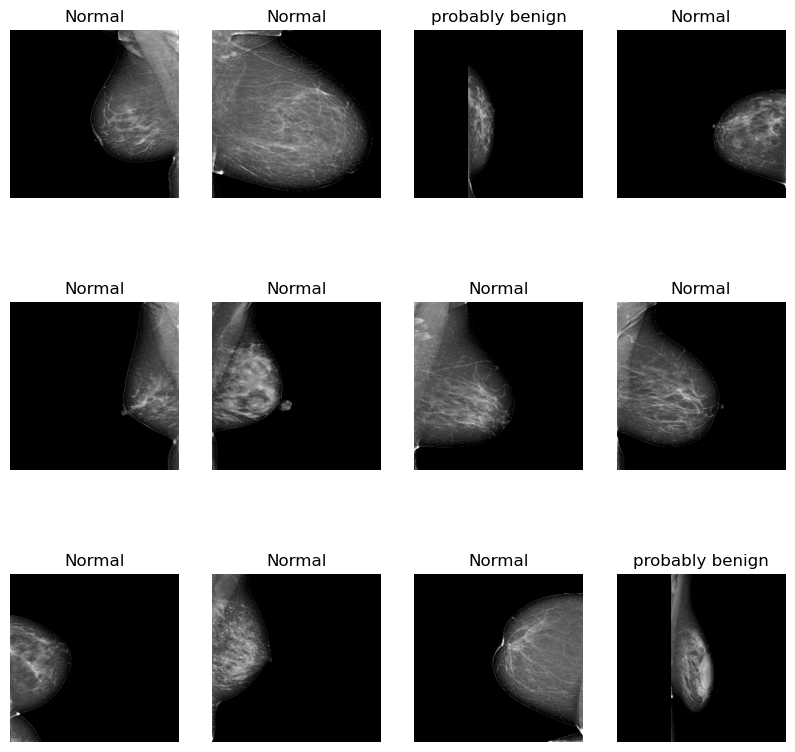

In [8]:
plt.figure(figsize=(10,10))#لتعديل المساحة بين الصور
for image_batch, label_batch in dataset.take(1):
    for i in range(12): 
        ax=plt.subplot(3,4,i+1)         #باش نقدر نطلع بالطناش الصورة
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])   #باش يطلع بإسم التصنيف متعها
        plt.axis("off")
    
    #كل مره حتطلع فيها صوره جديده
    #'  طلعت الصوره الاولى فالمجموعةكمصفوفة تلاتية الابعاد استعملت astype("uint8") لان النمباي مش حطلعها مزبوط بروحها فدرتلها تعويم'

In [9]:
len(dataset)#حاليا بنقسم مجموعة البيانات للتدريب

75

In [10]:
#80% ==> training
#20% ==> 10%validation,10%test

In [11]:
train_size=0.8
len(dataset)*train_size
#dataset.take(10)_siz

60.0

In [12]:
train_ds = dataset.take(57)
len(train_ds)

57

In [13]:
test_ds=dataset.skip(57)
len(test_ds)

18

In [14]:
val_size=0.1
len(dataset)*val_size

7.5

In [15]:
val_ds = test_ds.take(7)
len(val_ds)

7

In [16]:
test_ds=test_ds.skip(7)
len(test_ds)



11

In [17]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle_size=1000):#دالة تقسيم الداتاسيت
    
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds
   

In [18]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle_size=1000):
    train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset) 

In [19]:
len(train_ds)

57

In [20]:
len(val_ds)

7

In [21]:
len(test_ds)

11

In [22]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) #نحسن بيانات النمودج
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)  
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [23]:
#ندير معالجة اولية للصور قبل متخش المودل
from tensorflow.keras import layers

IMAGE_SIZE = (256, 256) #noise 

resize_and_rescale = tf.keras.Sequential([
   layers.Resizing(*IMAGE_SIZE),
   layers.Rescaling(1.0/255)
])

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# تعريف تعزيز البيانات
data_augmetation = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=20
)

In [30]:
#from tensorflow.keras import layers

#tf.keras.Sequential([
 #  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  # layers.experimental.preprocessing.Resizing(1.0/255)
    
#])

In [50]:
#from tensorflow.keras import models, layers, Input
#from tensorflow.keras.layers import Rescaling

#input_shape=(CHANNELS,IMAGE_SIZE,IMAGE_SIZE,BATCH_SIZE)
#n_classes=3

#model = models.Sequential([
 #  resize_and_rescale,
  #  data_augmetation,
   # layers.Conv2D(32,(3,3),activation ='relu',input_shape=input_shape),
   # layers.MaxPooling2D((2,2)),
    #layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    #layers.MaxPooling2D((2,2)),
    #layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    #layers.MaxPooling2D((2,2)),
    #layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    #layers.MaxPooling2D((2,2)),
#    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
 #   layers.MaxPooling2D((2,2)),
  #  layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
   # layers.MaxPooling2D((2,2)),
    #layers.Flatten(),
    #layers.Dense(64,activation='relu'),
  #  layers.Dense(n_classes,activation='softmax'),
     
#])

#model.build(input_shape=input_shape)

In [98]:
#from tensorflow.keras import models, layers, Input

# شكل البيانات المدخلة)
#input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
#n_classes = 3

# طبقة الإدخال
#input_layer = Input(shape=input_shape)

# طبقة إعادة التقييم (لتطبيع قيم البكسل بين 0 و 1)


# لفات التفافية (Conv2D) مع تجمع أقصى (MaxPooling2D)
#conv1_layer = layers.Conv2D(32, (3, 3), activation='relu')(rescaled_layer)
#maxpool1_layer = layers.MaxPooling2D((2, 2))(conv1_layer)
#conv2_layer = layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(maxpool1_layer)
#maxpool2_layer = layers.MaxPooling2D((2, 2))(conv2_layer)
#conv3_layer = layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(maxpool2_layer)
#maxpool3_layer = layers.MaxPooling2D((2, 2))(conv3_layer)
#conv4_layer = layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(maxpool3_layer)
#maxpool4_layer = layers.MaxPooling2D((2, 2))(conv4_layer)
#conv5_layer = layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(maxpool4_layer)
#maxpool5_layer = layers.MaxPooling2D((2, 2))(conv5_layer)

# تسطيح المخرجات من اللفات التفافية إلى متجه واحد
#flatten_layer = layers.Flatten()(maxpool5_layer)

# طبقة كثيفة مخفية (Dense) مع وحدات تحفيز ReLU
#dense1_layer = layers.Dense(64, activation='relu')(flatten_layer)

# طبقة الإخراج مع وحدات تحفيز Softmax (لتصنيف متعدد الفئات)
#output_layer = layers.Dense(n_classes, activation='softmax')(dense1_layer)

# بناء النموذج
#model = models.Model(inputs=input_layer, outputs=output_layer)

# تلخيص النموذج (اختياري)



In [59]:
#from tensorflow.keras.preprocessing.image import ImageDataGenerator


# تكوين النموذج
#model = models.Sequential([
 ##  layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    #layers.MaxPooling2D((2, 2)),
  # layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
#    layers.MaxPooling2D((2, 2)),
#    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
#    layers.MaxPooling2D((2, 2)),
#    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
#    layers.MaxPooling2D((2, 2)),
 #   layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
  #  layers.MaxPooling2D((2, 2)),
#    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
#    layers.MaxPooling2D((2, 2)),
#    layers.Flatten(),
#    layers.Dense(64, activation='relu'),
 #   layers.Dense(n_classes, activation='softmax')
#])



# إضافة طبقة تعديل البيانات إلى النموذج
#model.add(layers.Lambda(lambda x: data_augmentation.flow(x, shuffle=False)))


In [51]:
#from tensorflow.keras import models, layers, Input

#input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
#n_classes = 3

#resize_and_rescale = layers.Rescaling(1./255)
#data_augmentation = ... # تعريف طبقة تعديل البيانات 

#model = models.Sequential([
 #  data_augmentation, #  إضافة طبقة تعديل البيانات هنا
  #  layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
   # layers.MaxPooling2D((2, 2)),
    #layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    #layers.MaxPooling2D((2, 2)),
    #layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
 #   layers.MaxPooling2D((2, 2)),
  #  layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
   # layers.MaxPooling2D((2, 2)),
   # layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
   # layers.MaxPooling2D((2, 2)),
  #  layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
   # layers.MaxPooling2D((2, 2)),
    #layers.Flatten(),
    #layers.Dense(64, activation='relu'),
    #layers.Dense(n_classes, activation='softmax')
#])

#model.build(input_shape=(None, IMAGE_SIZE, IMAGE_SIZE, CHANNELS))

In [27]:
from tensorflow.keras import models, layers


CHANNELS = 3  
IMAGE_SIZE = 256  
BATCH_SIZE = 32  
n_classes = 3  

 
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),#تحول الصوره لي مصفوفه احادية قبل متخش الطبقة التانية
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),#دالة التنشيط softmax لإعطاء احتمالات لكل فئة تصنيف
])



In [28]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(          #تجميع النمودج
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics=['accuracy']
)

In [39]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.7719 - loss: 1.1756 - val_accuracy: 0.9509 - val_loss: 0.1942
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.9461 - loss: 0.1805 - val_accuracy: 0.9420 - val_loss: 0.1718
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.9459 - loss: 0.1578 - val_accuracy: 0.9420 - val_loss: 0.1691
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.9509 - loss: 0.1428 - val_accuracy: 0.9330 - val_loss: 0.1660
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.9531 - loss: 0.1283 - val_accuracy: 0.9330 - val_loss: 0.1590
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.9534 - loss: 0.1129 - val_accuracy: 0.9464 - val_loss: 0.1503
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.9584 - loss: 0.1064 - val_accuracy: 0.9509 - val_loss: 0.1630
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.9533 - loss: 0.1202 - val_accuracy: 0.9598 - val_lo

In [40]:
scores = model.evaluate(test_ds)

11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 306ms/step - accuracy: 0.9437 - loss: 0.3621


In [41]:
scores

[0.38817933201789856, 0.9451219439506531]

In [42]:
history

In [44]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 57}

In [45]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [147]:
#history.history['accuracy']

[0.8689693212509155,
 0.9396929740905762,
 0.9375,
 0.9336622953414917,
 0.9396929740905762,
 0.9429824352264404,
 0.9490131735801697,
 0.9517543911933899,
 0.9523026347160339,
 0.9616228342056274,
 0.9671052694320679,
 0.9764254093170166,
 0.96875,
 0.9649122953414917,
 0.9725877046585083,
 0.9835526347160339,
 0.9725877046585083,
 0.9868420958518982,
 0.9786184430122375,
 0.9835526347160339,
 0.9862938523292542,
 0.9989035129547119,
 0.9989035129547119,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [ ]:
#len(history.history['accuracy'])

In [47]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

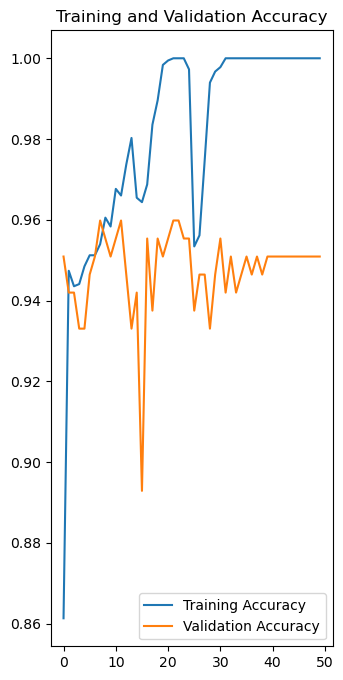

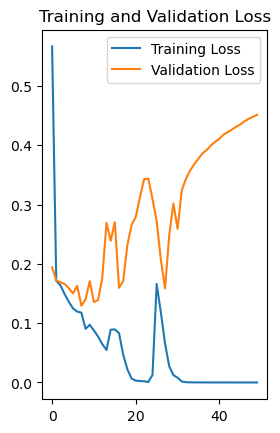

In [48]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

plt.subplot(1,2,1)
plt.plot(range(EPOCHS),loss, label='Training Loss')
plt.plot(range(EPOCHS),val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [223]:
np.argmax([1.7538217e-04 ,8.8024377e-10, 9.9982470e-01])

2

first_image to predict
 actual label: Normal
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 804ms/step
predicted label: Normal


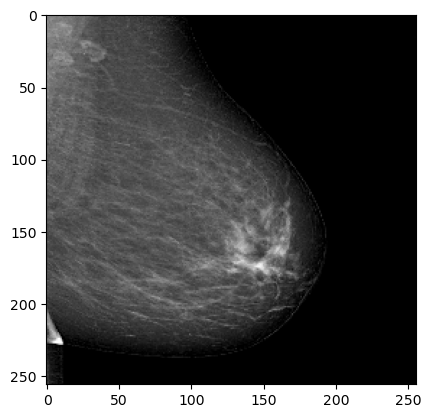

In [49]:
#for image_batch, labels_batch in test_ds.take(1):
    
    #print(image_batch[0]) #from tensoe
    
#for image_batch, labels_batch in test_ds.take(1):
    
   # print(image_batch[0].numpy()) # بدل التنسر نمباي  مجرد اختلاف تنسيق لاغير    
#np.argmax
import numpy as np
for image_batch, labels_batch in test_ds.take(1):
    
    first_image=image_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0].numpy()
    print("first_image to predict")
    plt.imshow(first_image)
    print(" actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)#التنبؤ لي 32
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [50]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    
    predictions = model.predict(img_array)
    
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


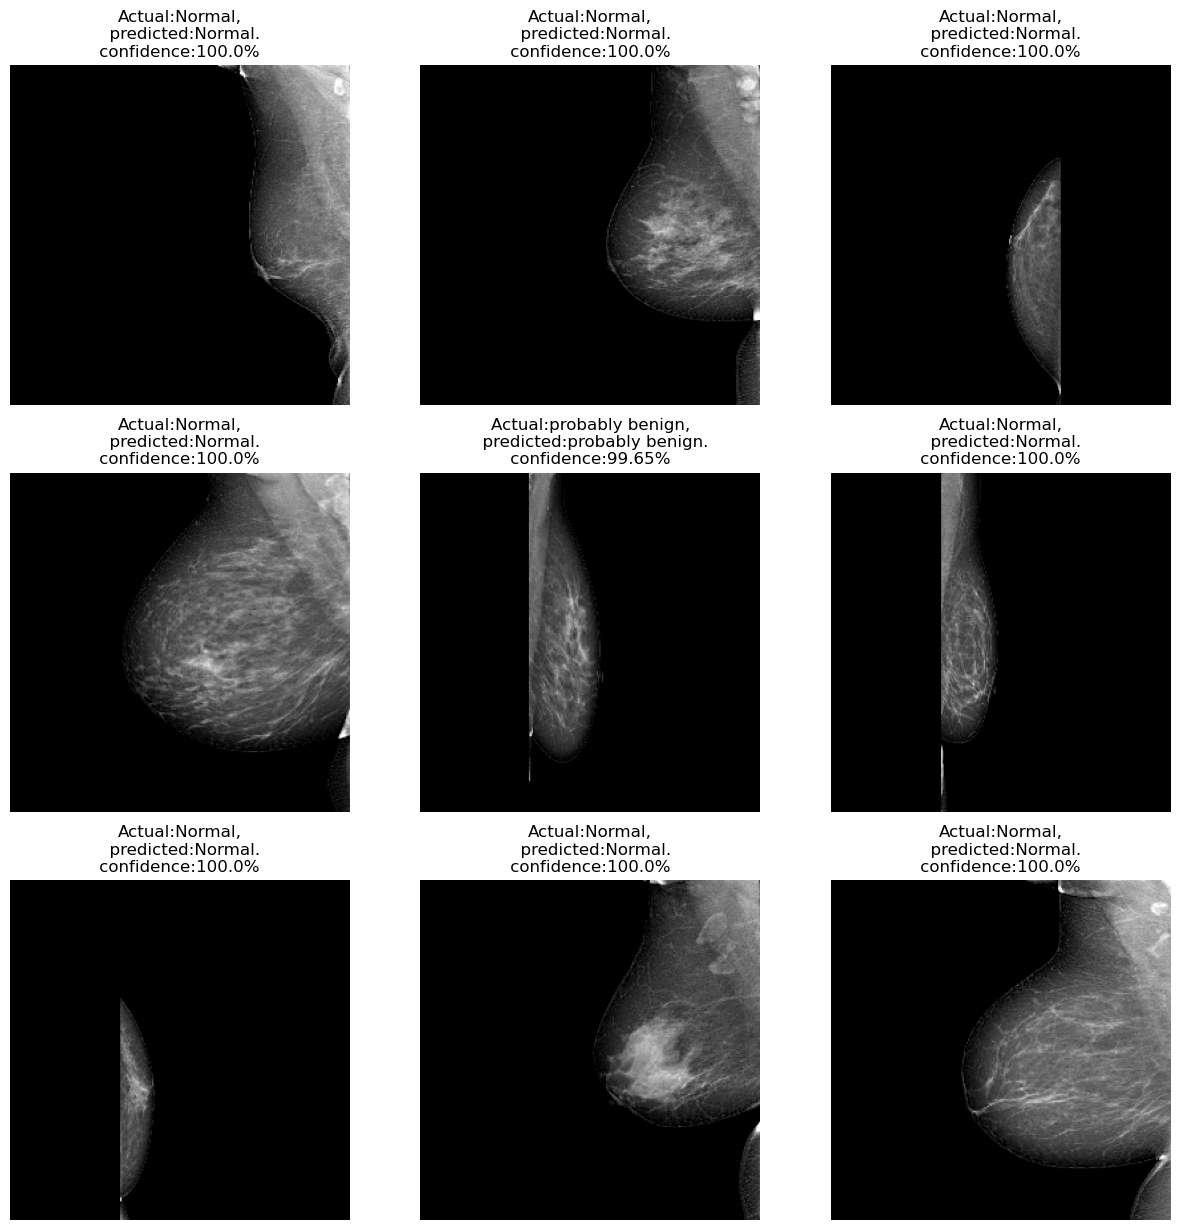

In [51]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        
        plt.title(f"Actual:{actual_class},\n  predicted:{predicted_class}.\n confidence:{confidence}% ")
        
        plt.axis("off")

In [70]:
#import os 
#model_version=max([int(i) for i in os.listdir("../models")+[0]])+1
#model.save(f"C:/Users/Zarqa_2023/Desktop/project_breas cancer3/models/model_{model_version}")

In [66]:
model_version = 2  # تحديد القيمة المناسبة لـ model_version كعدد صحيح
filepath = f"C:/Users/Zarqa_2023/Desktop/project_breas cancer3/models/model_{str(model_version)}.keras"
model.save(filepath)